Notebook for testing nn performance

2022-11-02 12:52:06.956503: I tensorflow/core/platform/cpu_feature_guard.cc:193] This TensorFlow binary is optimized with oneAPI Deep Neural Network Library (oneDNN) to use the following CPU instructions in performance-critical operations:  AVX2 FMA
To enable them in other operations, rebuild TensorFlow with the appropriate compiler flags.


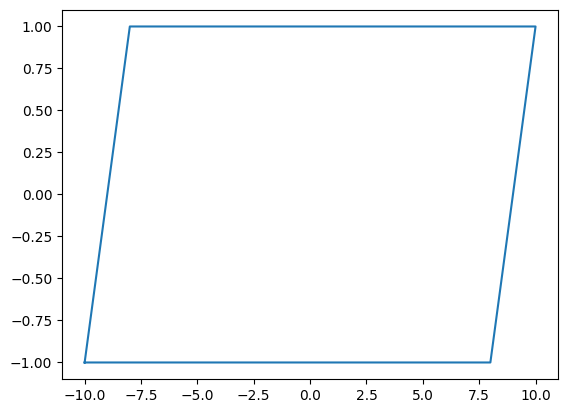

In [1]:
# import dependencies
import tensorflow as tf
import numpy as np
import matplotlib.pyplot as plt

from data_preprocessing import extract_csv_info, format_data, shuffle_and_split, split_input_output, extract_csv_info_datasets_folder
from neural import train_and_generate_feedforward_network, train_and_generate_recurrent_network, train_and_generate_preisach_network, train_and_generate_recurrent_preisach_network

In [2]:
# Function to compute MSE of predicted values
def compute_mse(actual_y, predicted_y):
    actual_y = np.asarray(actual_y)
    predicted_y = np.asarray(predicted_y)
    diff = np.subtract(actual_y, predicted_y)
    squared = np.square(diff)
    mse = np.mean(squared)
    return mse


# test compute mse
# y = [11, 20, 19, 17, 10]
# y_pred = [12, 18, 19.5, 18, 9]
# print(compute_mse(y, y_pred))

In [3]:
# Function for plotting predicted values from NN
# TODO: add figsize and xlim as input to function to allow customization
def plot_predicted(next_h, next_b, model_name):
    plt.figure(figsize=(20, 12))
    plt.xlim(-750, 750)
    plt.plot(next_h, next_b, marker="o", color='black')
    plt.title(model_name + " Output Plot")
    plt.xlabel("Magnetic Field H (T)")
    plt.ylabel("Magnetic Flux B (A/m)")
    plt.show()

## Data Loading and Preprocessing

In [4]:
# Load data for training
# raw_train_data = extract_csv_info("./data_simulated/M19_29Gauge - Sheet1.csv")
raw_train_data = extract_csv_info_datasets_folder("./datasets/HB_Comb.csv")
# format into (current H, current B, next H, next B)
formatted_data = format_data(raw_train_data)
#train, test = shuffle_and_split(formatted_data)
train_x, train_y = split_input_output(formatted_data)
#test_x, test_y = split_input_output(test)
print(len(train_x))

3563


In [5]:
# Load data for testing
raw_test_data = extract_csv_info("./data_simulated/M19_TESTINGDATA - M19_TESTINGDATA.csv")
formatted_test_data = format_data(raw_test_data)
test_x, test_y = split_input_output(formatted_test_data)

# Separate next_h values into separate list for plotting output
test_next_h = list()
for i in range(len(test_x)):
    test_next_h.append(test_x[i][2])

print(len(test_next_h))
print(len(test_x))

1177
1177


## Recurrent Preisach NN

In [14]:
# Generate and train recurrent preisach network
n = 20
rpnn_model = train_and_generate_recurrent_preisach_network(train_x[0:3552], train_y[0:3552], "recurrent_preisach.model", n_epochs=n)

Epoch 1/20
111/111 [==============================] - 29s 4ms/step - loss: 0.9699 - mean_squared_error: 0.9699
Epoch 2/20
111/111 [==============================] - 0s 4ms/step - loss: 0.9071 - mean_squared_error: 0.9071
Epoch 3/20
111/111 [==============================] - 0s 3ms/step - loss: 0.9084 - mean_squared_error: 0.9084
Epoch 4/20
111/111 [==============================] - 0s 3ms/step - loss: 0.8979 - mean_squared_error: 0.8979
Epoch 5/20
111/111 [==============================] - 0s 3ms/step - loss: 0.9159 - mean_squared_error: 0.9159
Epoch 6/20
111/111 [==============================] - 0s 3ms/step - loss: 0.9019 - mean_squared_error: 0.9019
Epoch 7/20
111/111 [==============================] - 0s 3ms/step - loss: 0.9045 - mean_squared_error: 0.9045
Epoch 8/20
111/111 [==============================] - 0s 3ms/step - loss: 0.8949 - mean_squared_error: 0.8949
Epoch 9/20
111/111 [==============================] - 0s 3ms/step - loss: 0.8826 - mean_squared_error: 0.8826
Epoch 10/

36/36 [==============================] - 4s 2ms/step


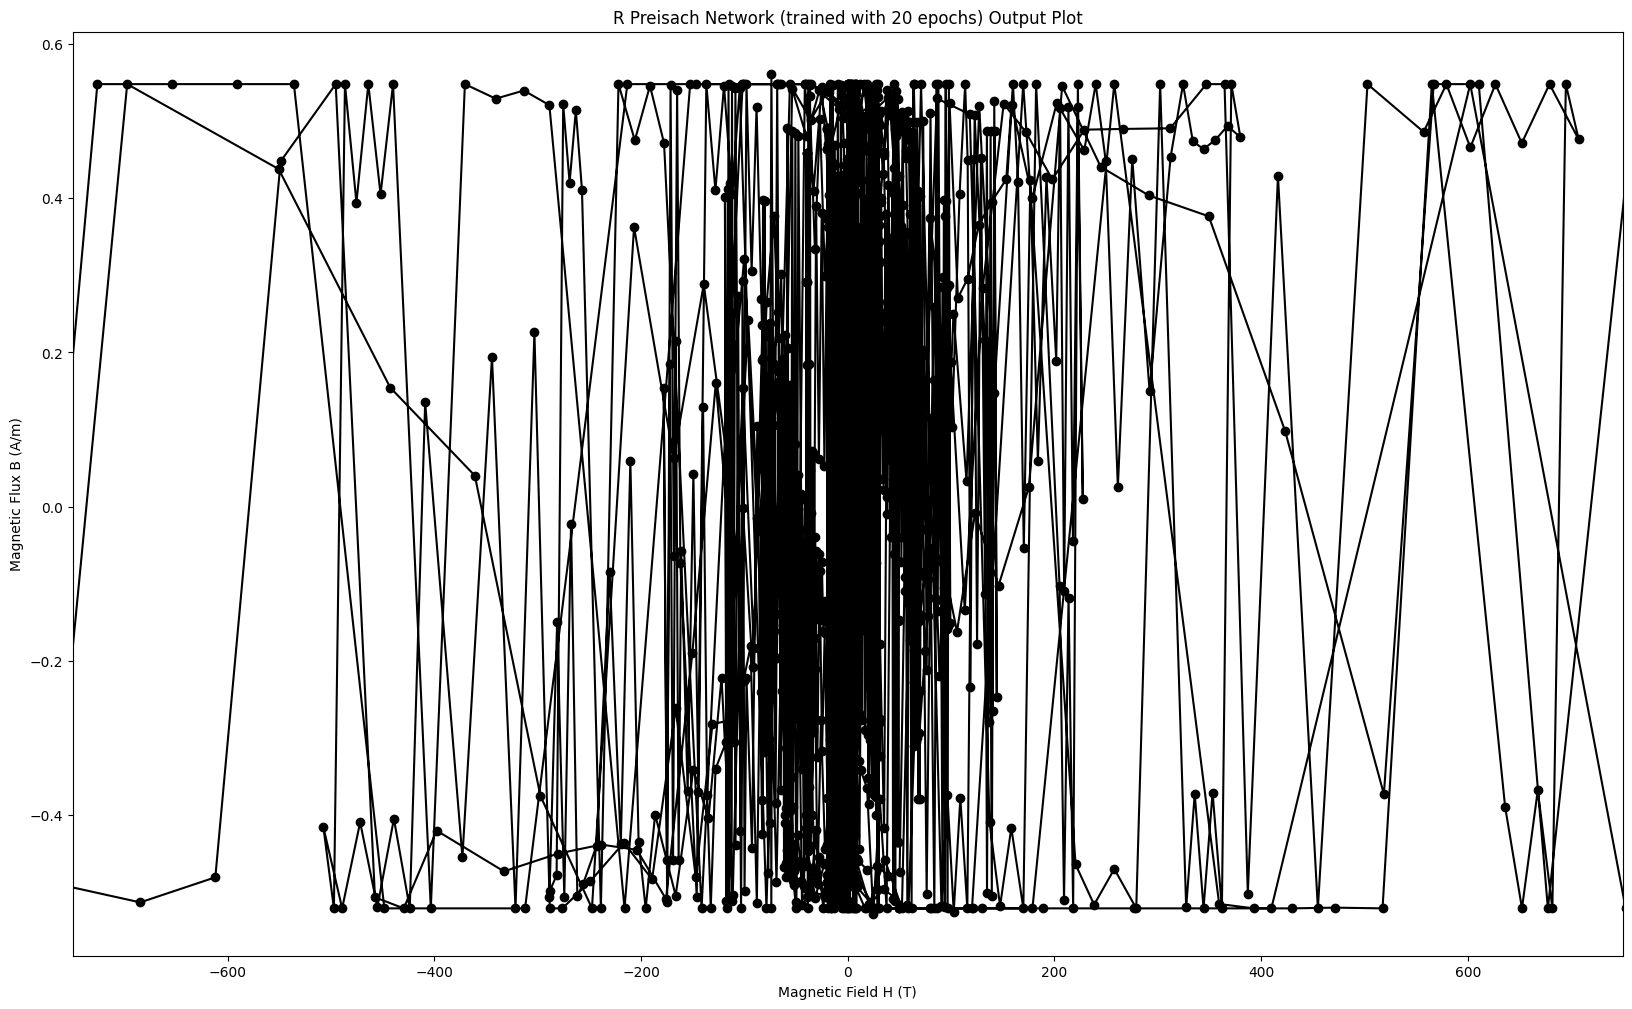

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_3 (Dense)             (32, 1)                   4         
                                                                 
 recurrent_preisach_layer3_1  (32, 10)                 40        
  (RecurrentPreisachLayer3)                                      
                                                                 
 dense_4 (Dense)             (32, 10)                  110       
                                                                 
 dense_5 (Dense)             (32, 1)                   11        
                                                                 
Total params: 165
Trainable params: 145
Non-trainable params: 20
_________________________________________________________________


In [9]:
# Evaluate and generate a plot of the RPNN
rpnn_prediction = rpnn_model.predict(test_x[0:1152])
plot_predicted(test_next_h[0:1152], rpnn_prediction[0:1152], "R Preisach Network (trained with {} epochs)".format(n))
rpnn_model.summary()

## Feedforward Network

In [10]:
# Generate and train feedforward network
feedforward_model = train_and_generate_feedforward_network(train_x, train_y, "feedforward.model", n_epochs=20)

Epoch 1/20
112/112 [==============================] - 1s 2ms/step - loss: 0.2094 - mean_squared_error: 0.2094
Epoch 2/20
112/112 [==============================] - 0s 2ms/step - loss: 0.0675 - mean_squared_error: 0.0675
Epoch 3/20
112/112 [==============================] - 0s 2ms/step - loss: 0.0519 - mean_squared_error: 0.0519
Epoch 4/20
112/112 [==============================] - 0s 2ms/step - loss: 0.0440 - mean_squared_error: 0.0440
Epoch 5/20
112/112 [==============================] - 0s 2ms/step - loss: 0.0370 - mean_squared_error: 0.0370
Epoch 6/20
112/112 [==============================] - 0s 2ms/step - loss: 0.0321 - mean_squared_error: 0.0321
Epoch 7/20
112/112 [==============================] - 0s 2ms/step - loss: 0.0255 - mean_squared_error: 0.0255
Epoch 8/20
112/112 [==============================] - 0s 2ms/step - loss: 0.0211 - mean_squared_error: 0.0211
Epoch 9/20
112/112 [==============================] - 0s 2ms/step - loss: 0.0161 - mean_squared_error: 0.0161
Epoch 10/2

In [11]:
# Load feedforward model
feedforward_model = tf.keras.models.load_model("./models/feedforward.model")

In [12]:
# Evaluate feedforward network
feedforward_prediction = feedforward_model.predict(test_x)
mse = compute_mse(test_y, feedforward_prediction)
print("MSE: " + str(mse))

# tensorflow evaluation
feedforward_model.evaluate(test_x, test_y)

37/37 [==============================] - 0s 2ms/step
MSE: 1.1113688587506434
37/37 [==============================] - 0s 1ms/step - loss: 0.1300 - mean_squared_error: 0.1300    


[0.13004644215106964, 0.13004644215106964]

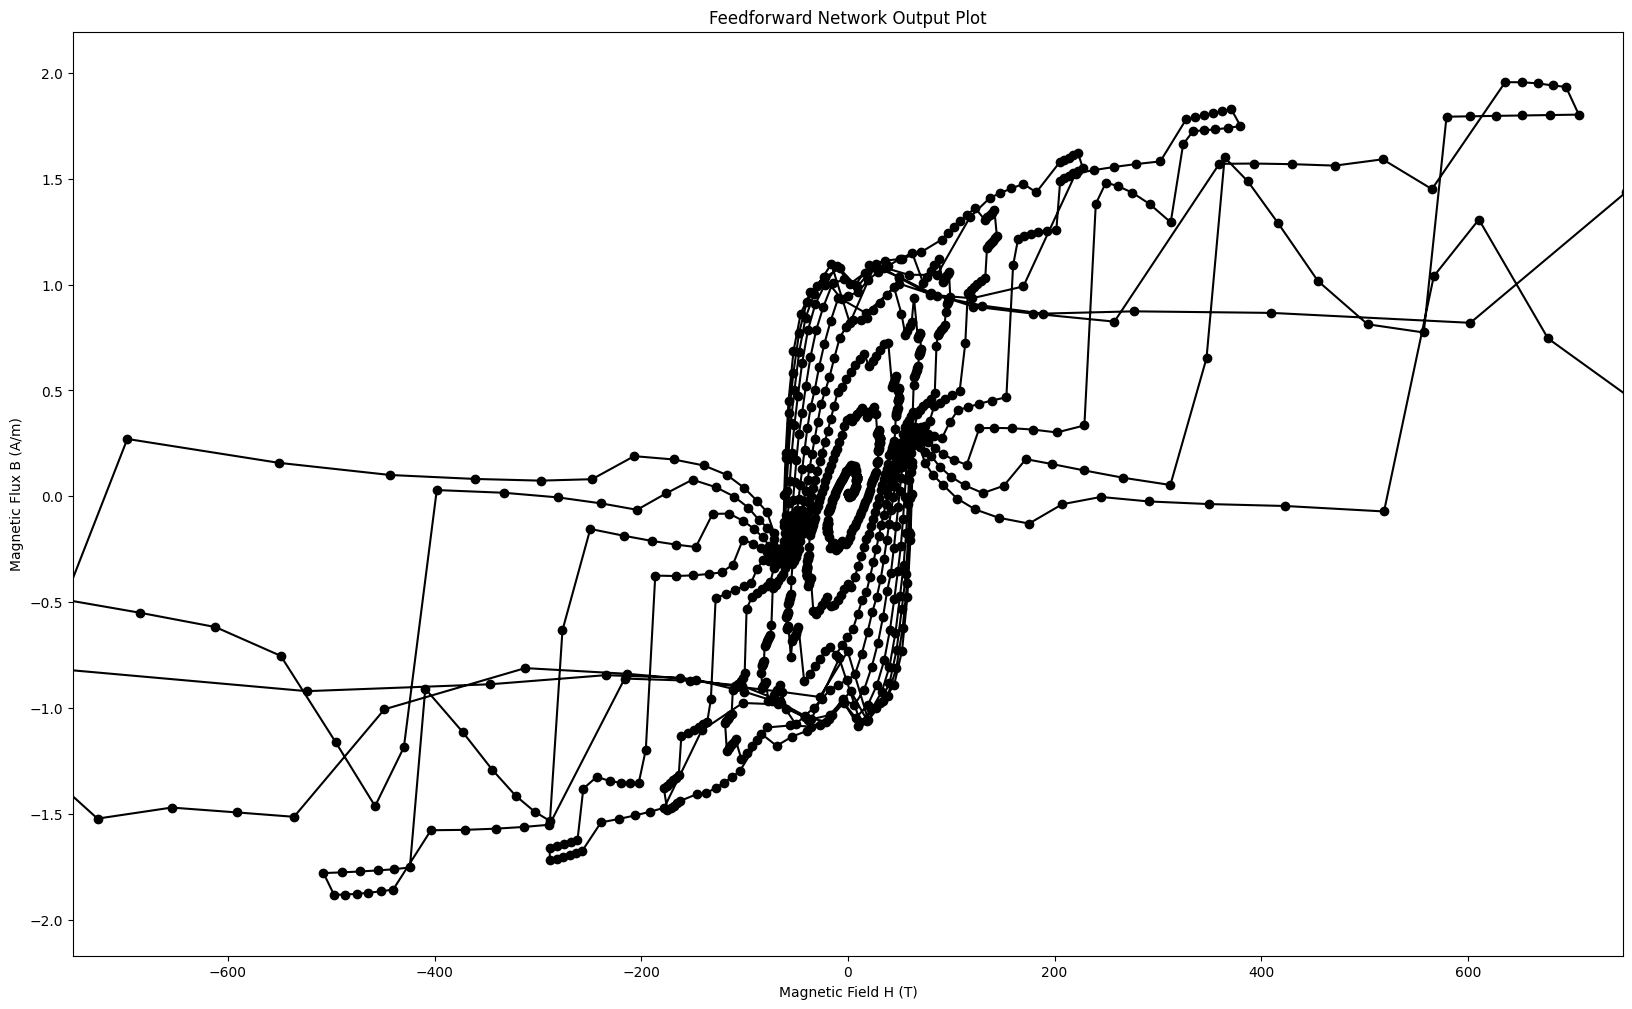

In [13]:
# Plot feedforward output
plot_predicted(test_next_h, feedforward_prediction, "Feedforward Network")

## Preisach Network

In [15]:
# Generate and train preisach network
pnn_model = train_and_generate_preisach_network(train_x, train_y, "preisach.model", n_epochs=20)

Epoch 1/20
112/112 [==============================] - 1s 2ms/step - loss: 0.5559 - mean_squared_error: 0.5559
Epoch 2/20
112/112 [==============================] - 0s 2ms/step - loss: 0.4690 - mean_squared_error: 0.4690
Epoch 3/20
112/112 [==============================] - 0s 2ms/step - loss: 0.4782 - mean_squared_error: 0.4782
Epoch 4/20
112/112 [==============================] - 0s 2ms/step - loss: 0.4678 - mean_squared_error: 0.4678
Epoch 5/20
112/112 [==============================] - 0s 2ms/step - loss: 0.4709 - mean_squared_error: 0.4709
Epoch 6/20
112/112 [==============================] - 0s 2ms/step - loss: 0.4577 - mean_squared_error: 0.4577
Epoch 7/20
112/112 [==============================] - 0s 2ms/step - loss: 0.4581 - mean_squared_error: 0.4581
Epoch 8/20
112/112 [==============================] - 0s 2ms/step - loss: 0.4590 - mean_squared_error: 0.4590
Epoch 9/20
112/112 [==============================] - 0s 2ms/step - loss: 0.4447 - mean_squared_error: 0.4447
Epoch 10/2

In [16]:
# Load preisach model
pnn_model = tf.keras.models.load_model("./models/preisach.model")

In [17]:
#Evaluate preisach model
pnn_prediction = pnn_model.predict(test_x)
mse = compute_mse(test_y, pnn_prediction)
print("MSE: " + str(mse))

# tensorflow evaluation
pnn_model.evaluate(test_x, test_y)

37/37 [==============================] - 0s 1ms/step
MSE: 1.0403109881575603
37/37 [==============================] - 0s 1ms/step - loss: 0.0692 - mean_squared_error: 0.0692    


[0.06920088827610016, 0.06920088082551956]

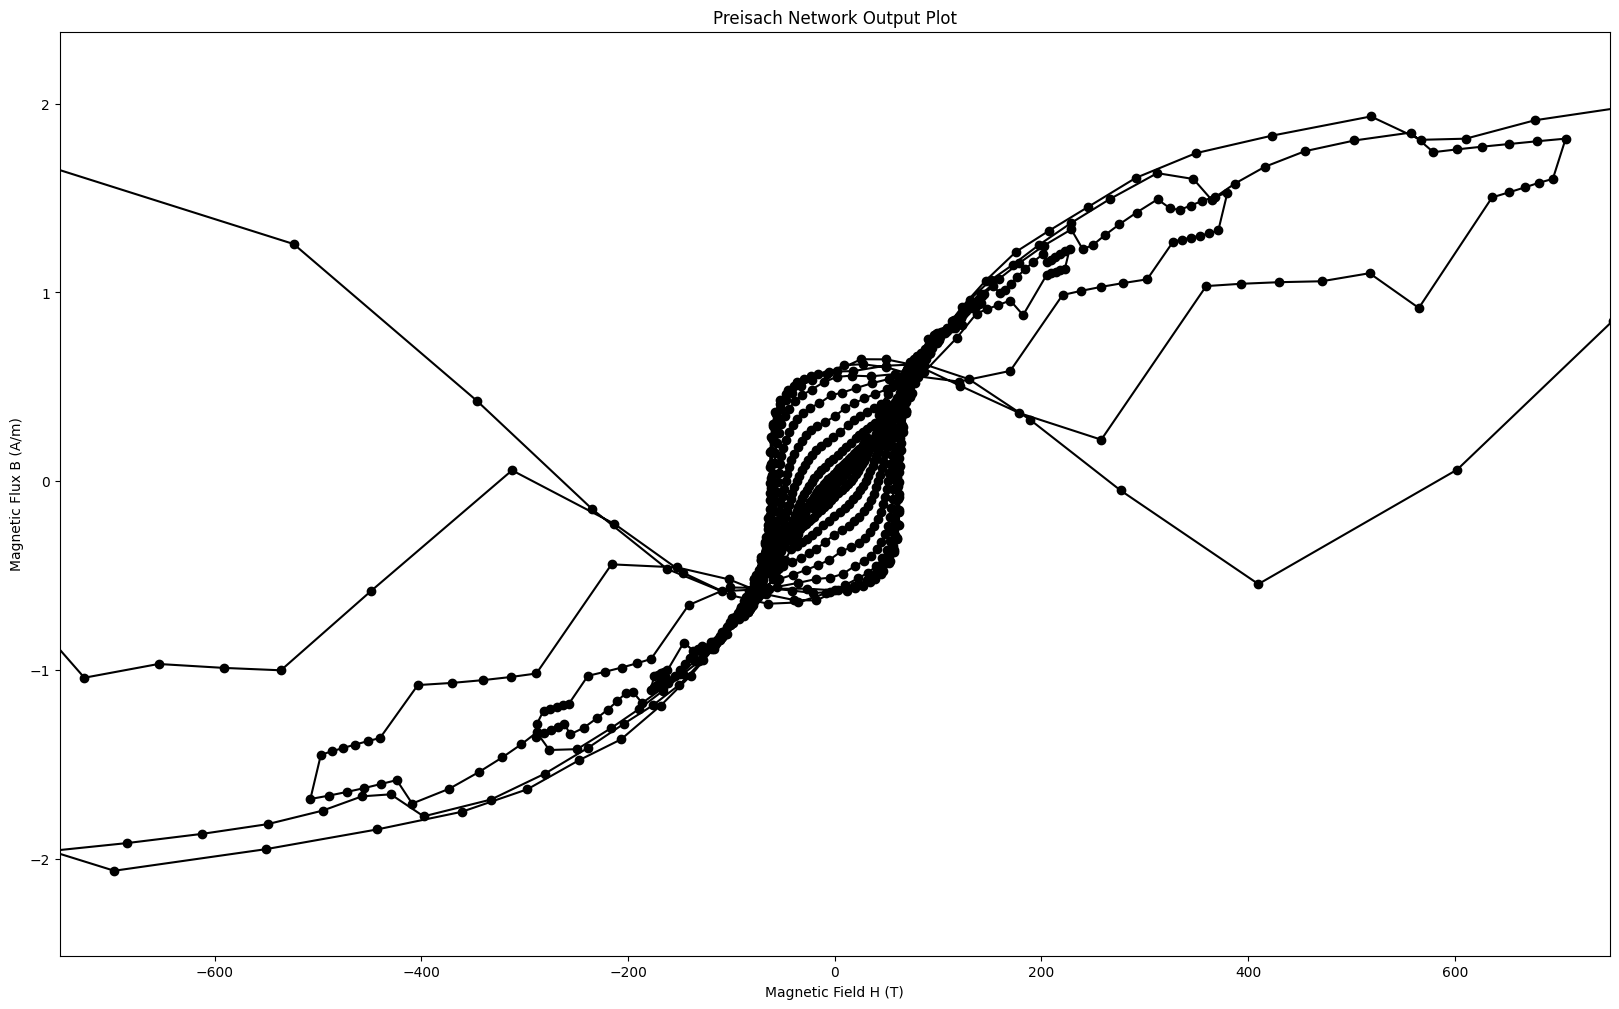

In [18]:
# Plot Preisach output
plot_predicted(test_next_h, pnn_prediction, "Preisach Network")

## Recurrent Network
no stop activation layer

In [19]:
# Generate and train recurrent network (no stop operator)
rnn_model = train_and_generate_recurrent_network(train_x, train_y, "recurrent.model", n_epochs=20)

Epoch 1/20
112/112 [==============================] - 26s 171ms/step - loss: 0.6840 - mean_squared_error: 0.6840
Epoch 2/20
112/112 [==============================] - 21s 190ms/step - loss: 0.4945 - mean_squared_error: 0.4945
Epoch 3/20
112/112 [==============================] - 16s 143ms/step - loss: 0.4969 - mean_squared_error: 0.4969
Epoch 4/20
112/112 [==============================] - 17s 152ms/step - loss: 0.4948 - mean_squared_error: 0.4948
Epoch 5/20
112/112 [==============================] - 18s 160ms/step - loss: 0.4864 - mean_squared_error: 0.4864
Epoch 6/20
112/112 [==============================] - 18s 157ms/step - loss: 0.4851 - mean_squared_error: 0.4851
Epoch 7/20
112/112 [==============================] - 17s 156ms/step - loss: 0.4792 - mean_squared_error: 0.4792
Epoch 8/20
112/112 [==============================] - 20s 180ms/step - loss: 0.4816 - mean_squared_error: 0.4816
Epoch 9/20
112/112 [==============================] - 20s 181ms/step - loss: 0.4779 - mean_squar

INFO:tensorflow:Assets written to: models/recurrent.model/assets


INFO:tensorflow:Assets written to: models/recurrent.model/assets


In [20]:
# Load recurrent network
rnn_model = tf.keras.models.load_model("./models/recurrent.model")

In [21]:
# Evaluate recurrent model
rnn_prediction = rnn_model.predict(test_x)
mse = compute_mse(test_y, rnn_prediction)
print("MSE: " + str(mse))

# tensorflow evaluation
rnn_model.evaluate(test_x, test_y)

37/37 [==============================] - 5s 85ms/step
MSE: 1.2749580894265566
37/37 [==============================] - 6s 85ms/step - loss: 0.1449 - mean_squared_error: 0.1449


[0.14491677284240723, 0.14491677284240723]

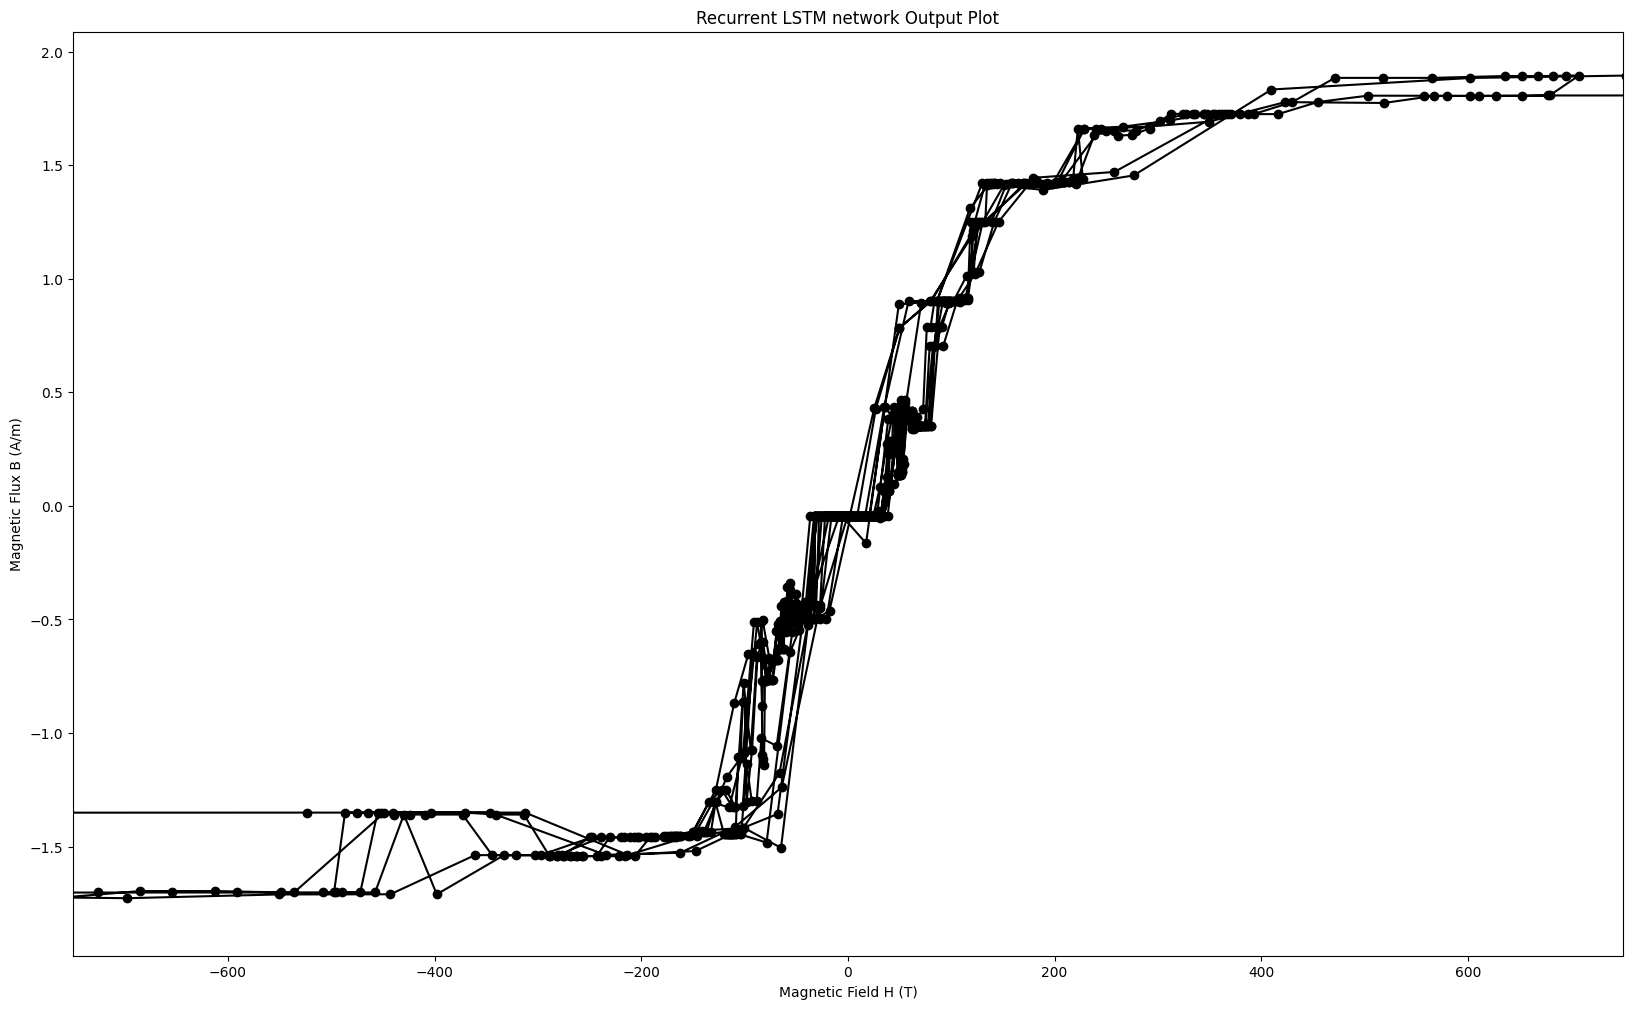

In [22]:
plot_predicted(test_next_h, rnn_prediction, "Recurrent LSTM network")